In [38]:
import pandas as pd
import numpy as np
import os 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, classification_report, precision_score
import pickle
import matplotlib.pyplot as plt
import seaborn as bs
from sklearn import tree 

In [39]:
#afficher le répertoire courant
#os.getcwd()
#Changer de répertoire de travail
#os.chdir(r'C:\Users\Admin\Desktop\AZIZ\PERSO')

In [40]:
#Chargement du DF
data = pd.read_excel('Copie de Coeur.xlsx')

In [41]:
#Travailler avec une copie du data Frame pour éviter de le rechager en cas d'êrreur
df = data.copy()

In [42]:
#Afficher les informations relatives au DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AGE          918 non-null    int64  
 1   SEXE         918 non-null    object 
 2   TDT          918 non-null    object 
 3   PAR          918 non-null    int64  
 4   CHOLESTEROL  918 non-null    int64  
 5   GAJ          918 non-null    int64  
 6   ECG          918 non-null    object 
 7   FCMAX        918 non-null    int64  
 8   ANGINE       918 non-null    object 
 9   DEPRESSION   918 non-null    float64
 10  PENTE        918 non-null    object 
 11  CŒUR         918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [43]:
#Normalisation des variables quantitatives
for col in df.drop('CŒUR', axis =1).select_dtypes(np.number).columns:
    df[col] = df[col]/df[col].max()


In [44]:
#Vérification des résultats
df.head()

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,0.519481,homme,AA,0.70,0.479270,0.0,Normal,0.851485,Non,0.000000,Ascendant,0
1,0.636364,femme,DNA,0.80,0.298507,0.0,Normal,0.772277,Non,0.161290,Plat,1
2,0.480519,homme,AA,0.65,0.469320,0.0,ST,0.485149,Non,0.000000,Ascendant,0
3,0.623377,femme,ASY,0.69,0.354892,0.0,Normal,0.534653,Oui,0.241935,Plat,1
4,0.701299,homme,DNA,0.75,0.323383,0.0,Normal,0.603960,Non,0.000000,Ascendant,0


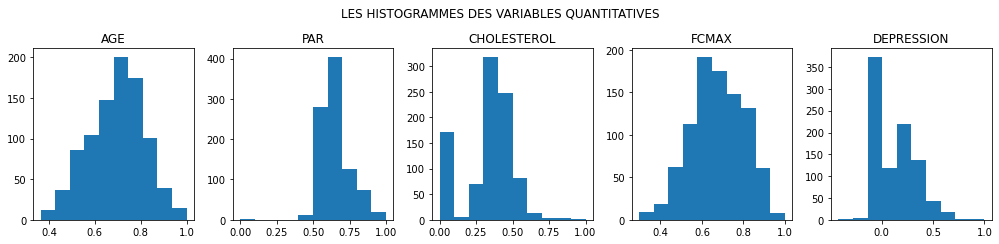

In [46]:
# representation graphique des variables quantitaves
qt = ['AGE', 'PAR', 'CHOLESTEROL', 'FCMAX', 'DEPRESSION']
plt.figure(tight_layout = True, figsize = (14, 6))
plt.suptitle("LES HISTOGRAMMES DES VARIABLES QUANTITATIVES")
for y,x in enumerate(qt):
    plt.subplot(2,5,y+1)
    plt.hist(df[x])
    plt.title(f"{qt[y]}")
plt.show()

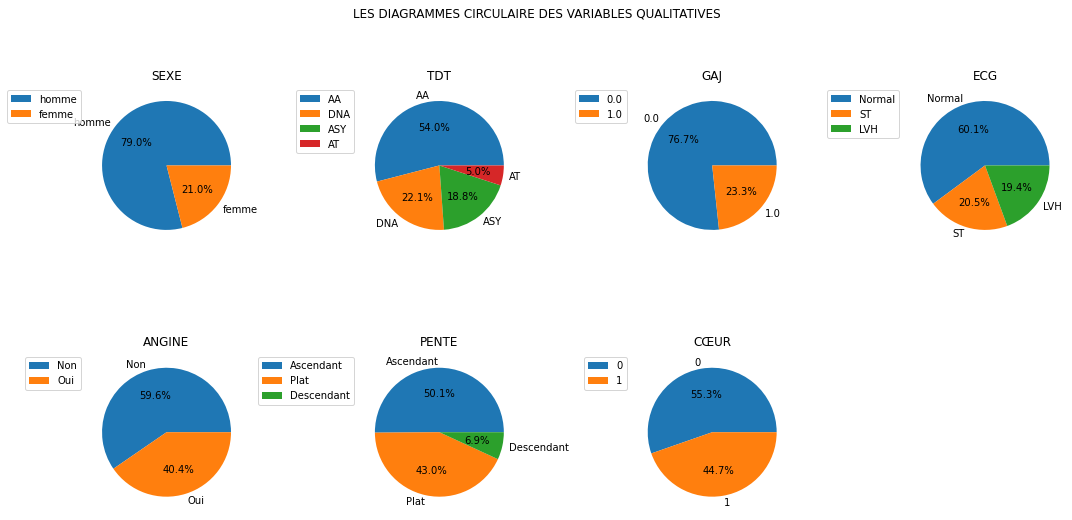

In [47]:
# representation graphique des variables qualitatives

qual = ['SEXE', 'TDT', 'GAJ', 'ECG', 'ANGINE', 'PENTE', 'CŒUR'] # la liste des variables qualitatives

plt.figure(tight_layout = True, figsize = (15,8))
plt.suptitle("LES DIAGRAMMES CIRCULAIRE DES VARIABLES QUALITATIVES")
for y,x in enumerate(qual):
    eff = df[x].value_counts()
    modalite = df[x].unique()
    plt.subplot(2,4,y+1)
    plt.pie(eff, labels = modalite, autopct = '%1.1f%%')
    plt.legend(bbox_to_anchor = (0, 1))
    plt.title(f"{qual[y]}")
plt.show()

In [48]:
#Encodage des variables qualitatives
for col in df.select_dtypes('object').columns:
    df[col] = df[col].astype('category').cat.codes

In [49]:
#Vérification des résultats
df.head()

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,0.519481,1,0,0.70,0.479270,0.0,1,0.851485,0,0.000000,0,0
1,0.636364,0,3,0.80,0.298507,0.0,1,0.772277,0,0.161290,2,1
2,0.480519,1,0,0.65,0.469320,0.0,2,0.485149,0,0.000000,0,0
3,0.623377,0,1,0.69,0.354892,0.0,1,0.534653,1,0.241935,2,1
4,0.701299,1,3,0.75,0.323383,0.0,1,0.603960,0,0.000000,0,0


In [50]:
#Séparer la variable cible (coeur) et les variables explicatives
y = df['CŒUR']
x = df.drop('CŒUR', axis = 1)

In [51]:
#Subdivision du jeu de données en apprentissage et en test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2, random_state =1)
#train_set, test_set = train_test_split(df,test_size =0.2, random_state =1)

In [52]:
#Vérifier le résultat
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(734, 11) (184, 11) (734,) (184,)


# Construire le Modèle d'arbre de décision

In [93]:
#Création d'un objet modelTree de la classe DecisionTreeClassifier
modelTree = tree.DecisionTreeClassifier(random_state=1, criterion='gini',max_depth=6 )

In [94]:
#Apprentissage du modèle 
modelTree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, random_state=1)

In [95]:
#Probabilité d'appartenance à l'une des classes
predict_proba = modelTree.predict_proba(x_test)
predict_proba[:5,:]

array([[0.13333333, 0.86666667],
       [0.08510638, 0.91489362],
       [0.01818182, 0.98181818],
       [0.01818182, 0.98181818],
       [0.5       , 0.5       ]])

In [96]:
#Application du modèle au données de test
y_pred = modelTree.predict(x_test)
y_pred[:5]

array([1, 1, 1, 1, 0], dtype=int64)

# Construire le Modèle  de la regression logistique

In [97]:
#Création d'un objet lr de la classe LogisticRegression
lr = LogisticRegression(solver ='newton-cg', random_state =1)

In [98]:
#Apprentissage du modèle
model = lr.fit(x_train, y_train)
#model = lr.fit(train_set.drop('CŒUR', axis = 1), train_set['CŒUR'])

In [113]:
#Probabilité d'appartenance à l'une des classes
predict_proba = model.predict_proba(x_test)
predict_proba[:5,:]

array([[0.39560595, 0.60439405],
       [0.18843348, 0.81156652],
       [0.04970935, 0.95029065],
       [0.09007617, 0.90992383],
       [0.28158313, 0.71841687]])

In [114]:
#Application du modèle au données de test
y_pred = model.predict(x_test)
y_pred[:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [115]:
#matrice de confusion
mc = confusion_matrix(y_test, y_pred)
mc

array([[ 66,   8],
       [  6, 104]], dtype=int64)

In [116]:
#Taux de bonnes prédictions
accuracy = accuracy_score(y_test, y_pred)
accuracy
#Conclusion : le modèle produit 85.32 % de bonne prédiction.

0.9239130434782609

In [117]:
#Sensibilité
recall = recall_score(y_test, y_pred)
recall
#conclusion : lorsqu'un individu est malade, nous avons 84.11 % de chance que le modèle le prédise.

0.9454545454545454

In [118]:
#Précision
precision = precision_score(y_test, y_pred)
precision
#Conclusion : lorsque le modèle prédit qu'un individu est malade, nous avons 90 % de chace que cela soit vraie.

0.9285714285714286

In [119]:
#plus de détails avec classification report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.89      0.90        74
           1       0.93      0.95      0.94       110

    accuracy                           0.92       184
   macro avg       0.92      0.92      0.92       184
weighted avg       0.92      0.92      0.92       184



In [120]:
#Modèle Trival
df['CŒUR'].value_counts()/df.shape[0]
#Conclusion : si nous nous basons sur le hasard pour faire nos prédiction, nous aurons 55.37 % de bonne prédiction.

1    0.553377
0    0.446623
Name: CŒUR, dtype: float64

In [121]:
#Score d'entrainement (le taux de bonne prédiction calculé sur la base des données d'entrainement)
precisionTrain = model.score(x_train, y_train)
print('precision de  Logistic Regression x_train: ', precisionTrain)

precision de  Logistic Regression x_train:  0.8433242506811989


In [122]:
#Score d'entrainement (le taux de bonne prédiction calculé sur la base des données de test)
precisionReel=model.score(x_test, y_test)
print('precision de Logistic Regression  x_test: ', precisionReel)

precision de Logistic Regression  x_test:  0.9239130434782609


In [123]:
#Score d'entrainement (le taux de bonne prédiction calculé sur la base des données d'entrainement)
#Score d'entrainement (le taux de bonne prédiction calculé sur la base des données de test)
precisionTreeReel = modelTree.score(x_test,y_test)
precisionTreeTrain = modelTree.score(x_train,y_train)

print('precision de  Arbre x_test: ', precisionTreeReel)
print('precision de  Arbre x_train: ', precisionTreeTrain)

precision de  Arbre x_test:  0.8369565217391305
precision de  Arbre x_train:  0.9223433242506812


# Comparons la régression logistique et l'arbre de décision

In [124]:
print( 'precision de  Arbre x_test: ', precisionTreeReel )
print('precision de Logistic Regression  x_test: ', precisionReel)
print('-------------------------------------------------------------------')
print('precision de  Arbre x_train: ', precisionTreeTrain)
print('precision de  Logistic Regression x_train: ', precisionTrain)

precision de  Arbre x_test:  0.8369565217391305
precision de Logistic Regression  x_test:  0.9239130434782609
-------------------------------------------------------------------
precision de  Arbre x_train:  0.9223433242506812
precision de  Logistic Regression x_train:  0.8433242506811989


In [125]:
#le module pour l'enregistrement du model
import pickle

In [127]:
pickle.dump(model,open('model.pkl','wb'))